In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

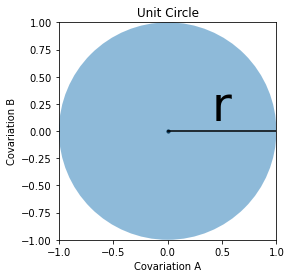

In [4]:
def make_circle(point=0):
    fig = plt.gcf()
    ax = fig.add_subplot(111,aspect='equal')
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=0.5))
    ax.scatter(0,0,s=10,color='black')
    ax.plot(np.linspace(0,1,100),np.zeros(100),color='black')
    ax.text(.4,.1,'r',size=48)
    ax.set_xlim(left=-1,right=1)
    ax.set_ylim(bottom=-1,top=1)
    plt.xlabel("Covariation A")
    plt.ylabel("Covariation B")
    plt.title("Unit Circle")
    
    if point:
        ax.text(.55,.9,"Faraway",color="purple")
        ax.scatter(.85,.85,s=10,color="purple")
    else:
        plt.show()
        
make_circle()

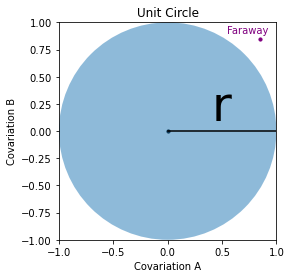

In [6]:
make_circle(1)

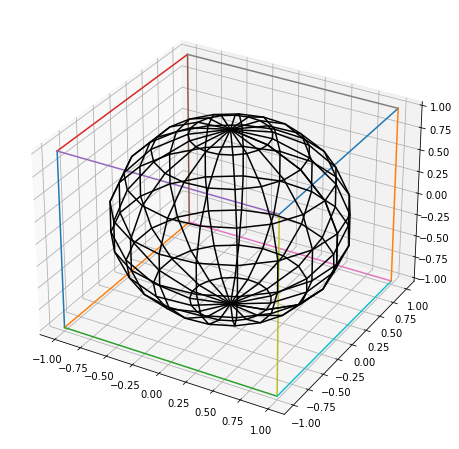

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

r = [-1,1]
for s,e in combinations(np.array(list(product(r,r,r))),2):
    if np.sum(np.abs(s-e))==r[1]-r[0]:
        ax.plot3D(*zip(s,e))
        
u,v = np.mgrid[0:2*np.pi:20j,0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x,y,z,color="black");

In [3]:
sample_data = np.random.sample((5,2))
print("samples data\n",sample_data,'\n')

def norm(x):
    return np.sqrt((x**2).sum(1))

def in_the_ball(x):
    return norm(x)<1

for x,y in zip(norm(sample_data),in_the_ball(sample_data)):
    print("Norm: ",x.round(2),"; is in circle? ",y)

samples data
 [[0.12665989 0.14090026]
 [0.79808719 0.80897191]
 [0.06615511 0.33375594]
 [0.89699311 0.02434616]
 [0.89871697 0.06187085]] 

Norm:  0.19 ; is in circle?  True
Norm:  1.14 ; is in circle?  False
Norm:  0.34 ; is in circle?  True
Norm:  0.9 ; is in circle?  True
Norm:  0.9 ; is in circle?  True


In [4]:
def what_percent_ncube_in_nball(d_dim,sample_size=10**4):
    shape = sample_size,d_dim
    data = np.array([in_the_ball(np.random.sample(shape)).mean() for iteration in range(100)])
    return data.mean()

dims = range(2,15)
data = np.array(list(map(what_percent_ncube_in_nball,dims)))

for dim,percent in zip(dims,data):
    print("Dimension: ",dim,"; percent in ball = ",data)

Dimension:  2 ; percent in ball =  [7.84534e-01 5.22716e-01 3.08209e-01 1.64941e-01 8.11050e-02 3.71630e-02
 1.60100e-02 6.38700e-03 2.41600e-03 9.36000e-04 3.01000e-04 1.37000e-04
 2.60000e-05]
Dimension:  3 ; percent in ball =  [7.84534e-01 5.22716e-01 3.08209e-01 1.64941e-01 8.11050e-02 3.71630e-02
 1.60100e-02 6.38700e-03 2.41600e-03 9.36000e-04 3.01000e-04 1.37000e-04
 2.60000e-05]
Dimension:  4 ; percent in ball =  [7.84534e-01 5.22716e-01 3.08209e-01 1.64941e-01 8.11050e-02 3.71630e-02
 1.60100e-02 6.38700e-03 2.41600e-03 9.36000e-04 3.01000e-04 1.37000e-04
 2.60000e-05]
Dimension:  5 ; percent in ball =  [7.84534e-01 5.22716e-01 3.08209e-01 1.64941e-01 8.11050e-02 3.71630e-02
 1.60100e-02 6.38700e-03 2.41600e-03 9.36000e-04 3.01000e-04 1.37000e-04
 2.60000e-05]
Dimension:  6 ; percent in ball =  [7.84534e-01 5.22716e-01 3.08209e-01 1.64941e-01 8.11050e-02 3.71630e-02
 1.60100e-02 6.38700e-03 2.41600e-03 9.36000e-04 3.01000e-04 1.37000e-04
 2.60000e-05]
Dimension:  7 ; percent i

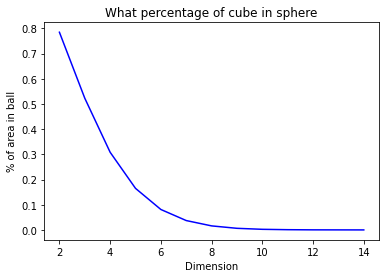

In [5]:
plt.plot(dims,data,color='blue')
plt.xlabel("Dimension")
plt.ylabel("% of area in ball")
plt.title("What percentage of cube in sphere")
plt.show()

In [6]:
def get_min_distance(dimension,sample_size=10**3):
    points = np.random.sample((sample_size,dimension))-.5
    return np.min(norm(points))

def estimate_closest(dimension):
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(),data.min(),data.max()

dims = range(2,100)
min_distance_data = np.array(list(map(estimate_closest,dims)))

print("For dimension 6",estimate_closest(6))

For dimension 6 (0.22255449260347887, 0.10235728429746056, 0.328846047363076)


Text(0.5, 1.0, 'How far away from the origin is the closest point')

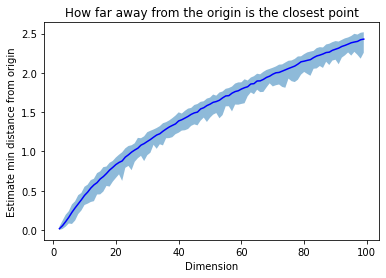

In [7]:
plt.plot(dims,min_distance_data[:,0],color='blue')
plt.fill_between(dims,min_distance_data[:,1],min_distance_data[:,2],alpha=0.5)
plt.xlabel("Dimension")
plt.ylabel("Estimate min distance from origin")
plt.title("How far away from the origin is the closest point")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [10]:
X,y = make_classification(n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=2)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=4,random_state=42)

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
score = dt.score(X_test,y_test)

In [12]:
print("Score for two feature classifier: ", score)

Score for two feature classifier:  1.0


In [13]:
X,y = make_classification(n_features=200,n_redundant=0,n_informative=200,random_state=1,n_clusters_per_class=2)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=4,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
score = dt.score(X_test,y_test)

In [14]:
print("Score for 200 features classifier: ", score)

Score for 200 features classifier:  0.25


In [16]:
scores = []
increment,max_feature = 50,4000
for num in np.linspace(increment,max_feature,increment,dtype = 'int'):
    X,y = make_classification(n_features=num,n_redundant=0,n_informative=num,random_state=1,n_clusters_per_class=2)

    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)

    X = StandardScaler().fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=4,random_state=42)

    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    score = dt.score(X_test,y_test)
    scores.append(score)

Text(0, 0.5, 'Classification Accuracy')

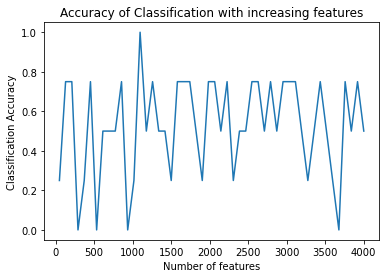

In [17]:
plt.plot(np.linspace(increment,max_feature,increment,dtype = 'int'),scores)
plt.title("Accuracy of Classification with increasing features")
plt.xlabel("Number of features")
plt.ylabel("Classification Accuracy")